# Summary of Dataset
This dataset contains geologic and geothermal data from wells in the Brady geothermal area in Nevada.
Key variables include measured depth (md), modeled normal stress changes (normal), dilation, Coulomb stress changes (coulomb), and modeled temperature (modeltemp).

### Key Goals:
- Clean data for it to go into the ML algorithm
- Perform unsupervised ML for finding the key geologic factors
- See how those factors compare to the ground truth found by researchers in that project, specifically what patterns can be observed in fault-related properties across depths in these data

### Observations:
- Dataset shape is: (34998, 28)
- No missing data from looking at the txt file
- Possible unnecessary columns for my projects, so could be cleaned up
- Pair plots don't look right, possibly just non-correlating data forms?
- Correlation map has some information, showing some of the chosen properites are related
- Temp distribution shows overall patterns in the temperature in this area
- CDF as well, possibly can be compared to other geothermal datasets to show potential of this Brady area?

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import sys
#sys.path.append('/content/drive/MyDrive/GEOL558 Colab/')

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load the dataset
file_path = 'https://github.com/jacksonhoward1856/GEOL558/blob/99babe51dd013d94ca5172ae828767ddd78236ab/AllBradyWells_LANL_ML_9.txt'  data = pd.read_csv(file_path)

In [6]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(data.head())

# Display the shape of the dataset
print(f"Dataset Shape: {data.shape}")

# Display basic statistical summary
print("Statistical Summary:")
display(data.describe())

# Check for missing values
missing_values = data.isnull().sum()
print(f"Missing Values:\n{missing_values}")

First 5 rows of the dataset:


,wellid,md,azimuth,inclination,x,y,z,casing,fluids,use,...,td,ts,curve,modeltemp,faultdense,faultintdense,inv_distfaults,inv_distcontacts,unitthick,goodlith
0,15-12,0.0,0.000,107.744,327137.93,4406034.67,1244.45,Cased,NotFlowing,Dry,...,0.0,0.0,0.0,44.097004,28.014448,5.091139,467.159090,788.704712,287.261000,0
1,15-12,1.0,0.001,107.744,327137.93,4406034.67,1243.45,Cased,NotFlowing,Dry,...,0.0,0.0,0.0,44.010479,28.057209,5.089971,467.605650,788.378540,21.781982,0
2,15-12,2.0,0.002,107.748,327137.93,4406034.67,1242.45,Cased,NotFlowing,Dry,...,0.0,0.0,0.0,43.971539,28.099934,5.088804,468.052294,787.378540,21.781982,0
3,15-12,3.0,0.001,107.750,327137.93,4406034.67,1241.45,Cased,NotFlowing,Dry,...,0.0,0.0,0.0,43.983322,28.142624,5.087639,468.498962,786.378540,21.781982,0
4,15-12,4.0,0.002,287.737,327137.93,4406034.67,1240.45,Cased,NotFlowing,Dry,...,0.0,0.0,0.0,44.048653,28.185276,5.086476,468.945629,785.378540,21.781982,0


Dataset Shape: (34998, 28)
Statistical Summary:


,md,azimuth,inclination,x,y,z,normal,dilation,coulomb,shear,...,td,ts,curve,modeltemp,faultdense,faultintdense,inv_distfaults,inv_distcontacts,unitthick,goodlith
count,34998.000000,34998.000000,34998.000000,34998.000000,3.499800e+04,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,...,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000,34998.000000
mean,598.307663,20.678785,57.827179,327628.989719,4.406989e+06,659.014096,33.282531,0.000020,38.377164,20.846379,...,0.274965,0.140580,0.000244,141.224728,40.385640,8.614501,474.281599,709.991318,263.392684,0.619578
std,503.288638,76.369231,113.357891,502.641942,8.250877e+02,497.280609,39.498941,0.000075,28.593130,28.070563,...,0.350811,0.177706,0.000444,37.295088,14.885438,5.770530,65.569984,105.696577,184.759337,0.485497
min,0.000000,0.000000,0.000000,326859.340000,4.405124e+06,-923.476000,-100.674385,-0.000240,-44.226177,-104.339317,...,0.000000,0.000000,0.000000,19.935362,0.244503,0.000427,-0.000000,-0.000000,0.000000,0.000000
25%,192.000000,0.000000,0.000000,327136.596000,4.406405e+06,364.205000,17.642687,-0.000013,25.848120,13.678746,...,0.000000,0.000000,0.000000,119.499409,31.395380,4.116627,462.780058,685.982622,90.187134,0.000000
50%,457.000000,0.000000,0.000000,327713.810000,4.407079e+06,796.590000,35.734249,0.000023,41.001829,23.784407,...,0.000000,0.000000,0.000000,148.788582,40.872898,7.280208,490.122093,744.394928,247.671257,1.000000
75%,887.000000,0.669000,27.166500,328065.700000,4.407485e+06,1064.730000,53.391490,0.000063,56.263975,37.747867,...,0.689248,0.358620,0.000287,169.563377,51.647523,12.196479,509.570209,772.956741,366.090149,1.000000
max,2213.723000,359.991000,359.963000,328813.040000,4.408874e+06,1277.290000,156.400345,0.000248,105.311188,87.588310,...,1.000000,0.400000,0.002820,211.104050,68.830605,26.058693,524.449800,788.704712,829.723000,1.000000


Missing Values:
wellid              0
md                  0
azimuth             0
inclination         0
x                   0
y                   0
z                   0
casing              0
fluids              0
use                 0
production          0
use2                0
lt750mstatus        0
normal              0
dilation            0
coulomb             0
shear               0
faults              0
td                  0
ts                  0
curve               0
modeltemp           0
faultdense          0
faultintdense       0
inv_distfaults      0
inv_distcontacts    0
unitthick           0
goodlith            0
dtype: int64


from matplotlib import pyplot as plt
_df_0['md'].plot(kind='hist', bins=20, title='md')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['azimuth'].plot(kind='hist', bins=20, title='azimuth')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['inclination'].plot(kind='hist', bins=20, title='inclination')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['x'].plot(kind='hist', bins=20, title='x')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='md', y='azimuth', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='azimuth', y='inclination', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='inclination', y='x', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='x', y='y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ts']
  ys = series['md']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('ts', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ts')
_ = plt.ylabel('md')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ts']
  ys = series['azimuth']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('ts', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ts')
_ = plt.ylabel('azimuth')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ts']
  ys = series['inclination']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('ts', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ts')
_ = plt.ylabel('inclination')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ts']
  ys = series['x']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('ts', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ts')
_ = plt.ylabel('x')

from matplotlib import pyplot as plt
_df_12['md'].plot(kind='line', figsize=(8, 4), title='md')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['azimuth'].plot(kind='line', figsize=(8, 4), title='azimuth')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['inclination'].plot(kind='line', figsize=(8, 4), title='inclination')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['x'].plot(kind='line', figsize=(8, 4), title='x')
plt.gca().spines[['top', 'right']].set_visible(False)

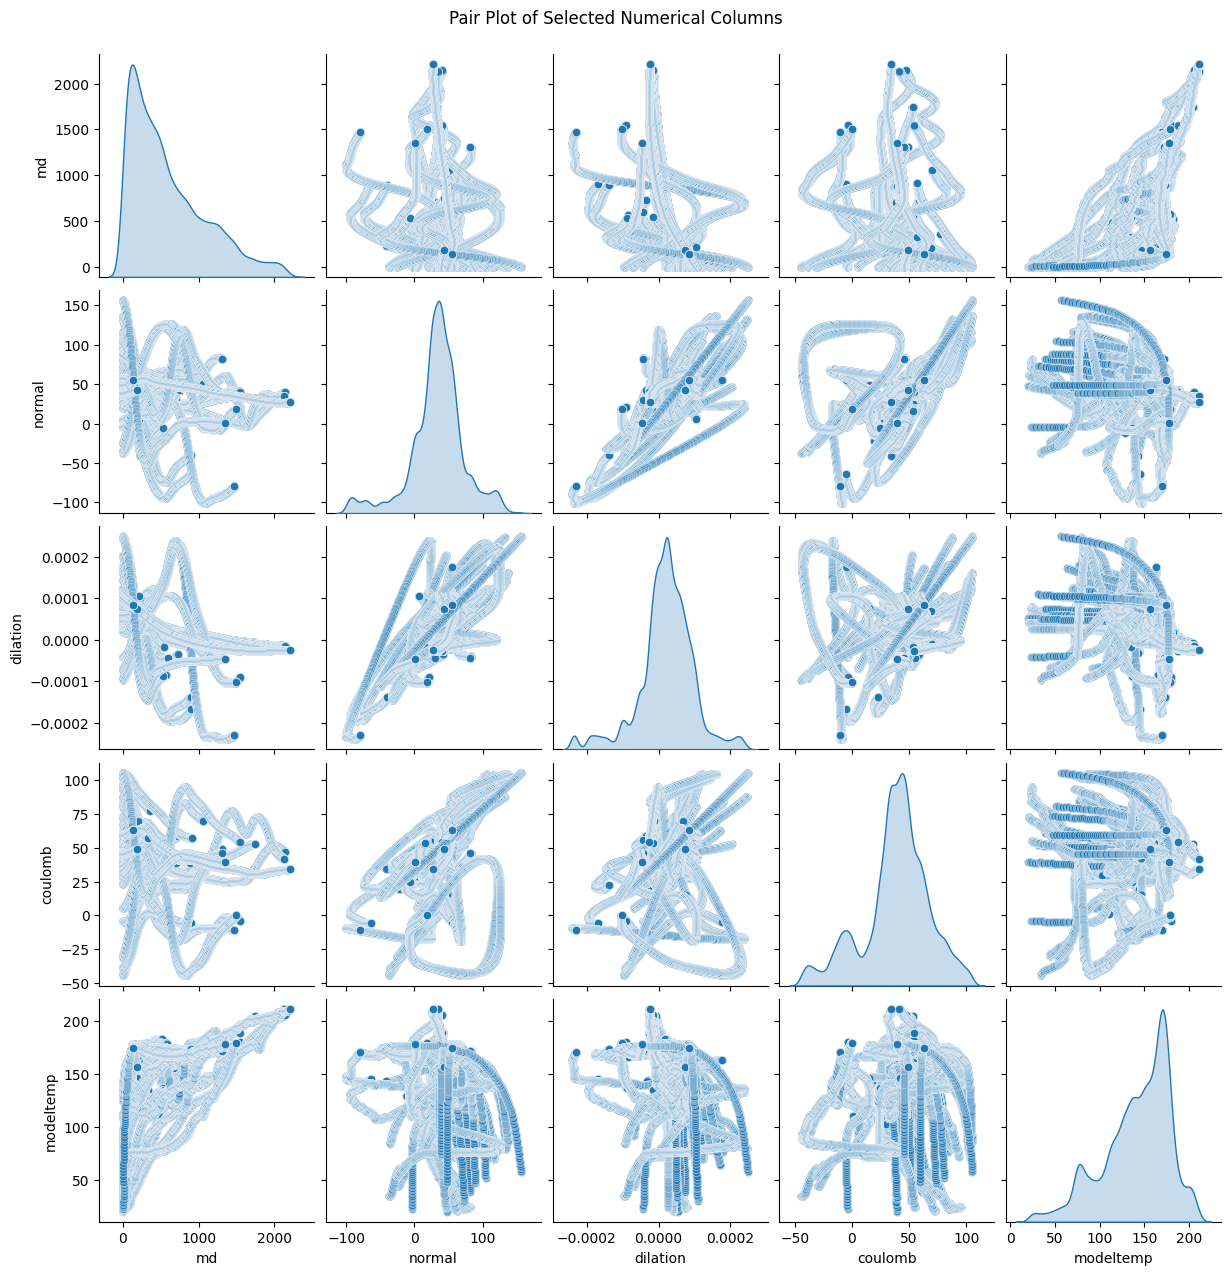

In [7]:
# Pair plot for selected numerical columns
selected_columns = ['md', 'normal', 'dilation', 'coulomb', 'modeltemp']
sns.pairplot(data[selected_columns], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle("Pair Plot of Selected Numerical Columns", y=1.02)
plt.show()

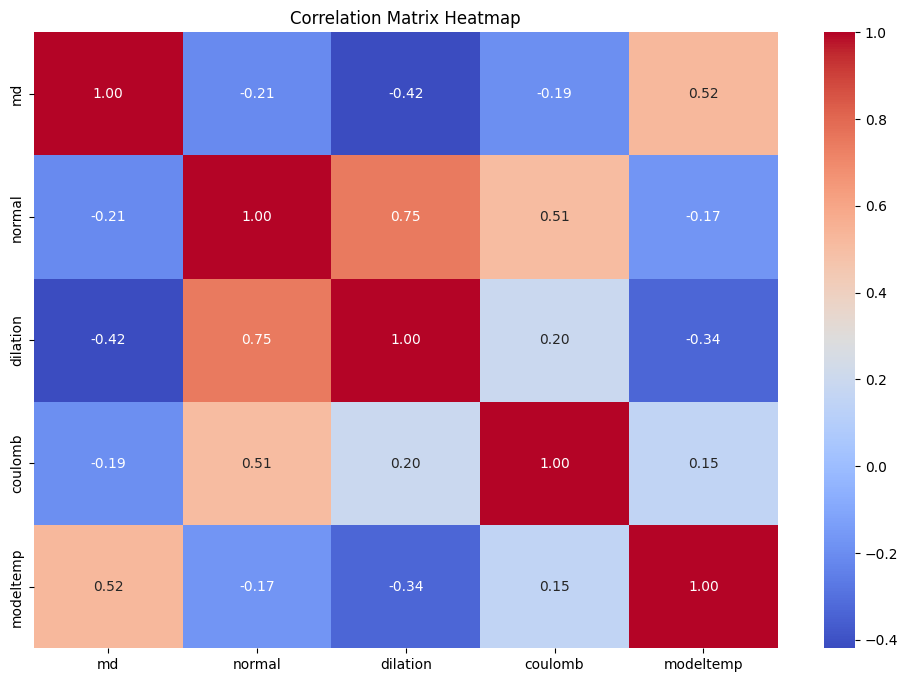

In [8]:
# Correlation matrix heatmap
correlation_matrix = data[selected_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

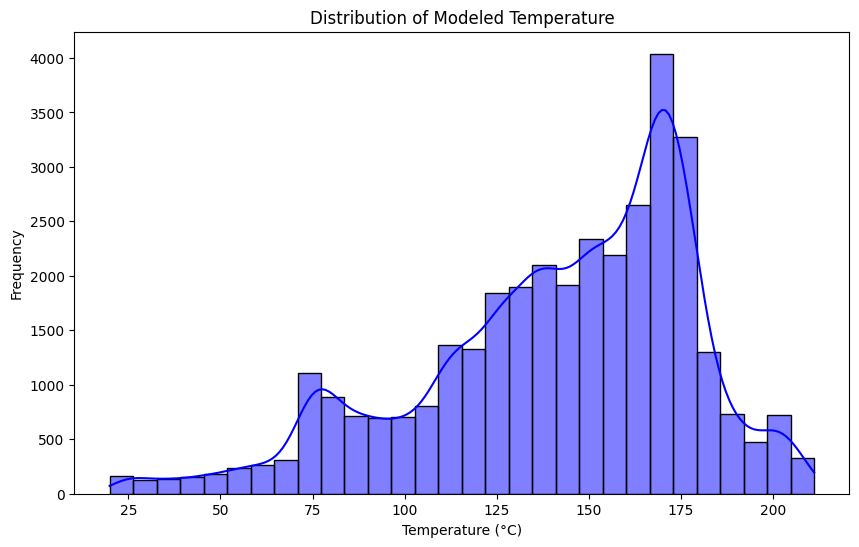

In [9]:
# Histogram of Model Temp
plt.figure(figsize=(10, 6))
sns.histplot(data['modeltemp'], kde=True, bins=30, color='blue')
plt.title("Distribution of Modeled Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

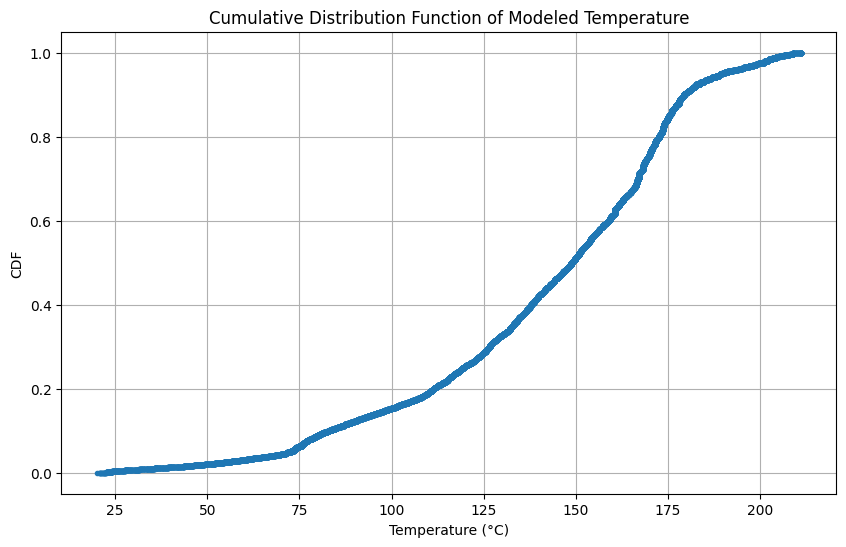

In [10]:
# Cumulative Distribution Function for Model Temp
sorted_data = np.sort(data['modeltemp'].dropna())
cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.figure(figsize=(10, 6))
plt.plot(sorted_data, cdf, marker='.', linestyle='none')
plt.title("Cumulative Distribution Function of Modeled Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("CDF")
plt.grid(True)
plt.show()